<center><h1 style="font-size:35px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(128,0,128);"> Pojet de Machine Learning 1</h1></center>
<center><h3 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(51,165,182);">Groupe 2 :  <br>Toussaint SOSSOU, Tiendrebeogo PANONGMANEGRE, Brahima TOU, Nicolas LOUGUÉ </h3></center>
ENSAE 2024 : ISE2

<center><h2 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em;">HOUSE PRICE PREDICTION </h2></center>

 <h2 style="text-align:justify; background-color:RGB(51,165,182);font-size:30px;font-family:Roboto"> II-PRE-PROCESSING </h2>
* Mettons les variables dans un format propice pour les modèle de Machine Learning 

In [1]:
# Manipulation de chemins de fichiers et dossiers
from pathlib import Path
# Création de graphiques et visualisations avec Matplotlib
import matplotlib.pyplot as plt
# Visualisation des données manquantes dans un ensemble de données
import missingno as msno
# Traitement de tableaux multidimensionnels avec des fonctions mathématiques
import numpy as np
# Analyse et manipulation de données tabulaires avec Pandas
import pandas as pd
# Création de visualisations interactives avec Plotly Express
import plotly.express as px
# Création de graphiques avec Plotly Graph Objects
import plotly.graph_objs as go
# Visualisation statistique de données avec Seaborn
import seaborn as sns
# Création de sous-graphiques avec Plotly
from plotly.subplots import make_subplots
# Génération de rapports de profilage de données avec YData Profiling
from ydata_profiling import ProfileReport
# Visualisation des résidus dans les modèles de régression avec Yellowbrick
from yellowbrick.regressor import ResidualsPlot
# désactiver les avertissements
import warnings
warnings.filterwarnings('ignore')
# Librairies pour la préparation des données et les modèles de régression
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Configuration des paramètres de scikit-learn
from sklearn import set_config
# Librairies pour l'évaluation des modèles et la manipulation des données
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_predict

In [5]:
# variable contenant le répertoire de travail
HOME_DIR = Path.cwd()
# variable contenant le repertoire des données
DATA_DIR = Path(HOME_DIR, "data")
print(f"Répertoire de travail: {HOME_DIR} \nRépertoire des donnés: {DATA_DIR}")
file_train = pd.read_csv(Path(DATA_DIR, "train.csv"), sep=",")

Répertoire de travail: C:\Users\Régis\Desktop\ISE2_2023-2024\semestre 3\Machine Learning\Début_projet 
Répertoire des donnés: C:\Users\Régis\Desktop\ISE2_2023-2024\semestre 3\Machine Learning\Début_projet\data


In [6]:
file_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis = 1, inplace = True) #Suppression des variables.
seuil_z_score = 3
# Calcul du Z-score pour chaque valeur dans la colonne 'SalePrice'
z_scores = np.abs((file_train['SalePrice'] - file_train['SalePrice'].mean()) / file_train['SalePrice'].std())

print(f"d'après notre critère, nous avons {len(file_train[z_scores > seuil_z_score])} valeurs aberantes pour la variable cible.")
# suppression des valeurs aberrantes en utilisant le seuil Z-score
file_train = file_train[z_scores < seuil_z_score]
file_train['LotFrontage'] = file_train['LotFrontage'].fillna(file_train['LotFrontage'].median())
file_train['MasVnrArea'] = file_train['MasVnrArea'].fillna(file_train['MasVnrArea'].median())
file_train['GarageYrBlt'] = file_train['GarageYrBlt'].fillna(file_train['GarageYrBlt'].median()) 

d'après notre critère, nous avons 22 valeurs aberantes pour la variable cible.


In [7]:
## Séparation de la variable cible et des variables explicatives
Variables_explicatives = file_train.drop('SalePrice', axis = 1)
Variable_expliquee = pd.DataFrame(file_train['SalePrice'])

In [8]:
print(f"Dimensions des variables explicatives : {Variables_explicatives.shape} \nDimensions de la variable expliquée: {Variable_expliquee.shape}")

Dimensions des variables explicatives : (1438, 75) 
Dimensions de la variable expliquée: (1438, 1)


In [9]:
## création de deux groupes de variables 
## les variables qualitatives et les variables quantitatives
## groupe des variables quantitatives
var_num = pd.DataFrame(Variables_explicatives.select_dtypes(include="number"))
## groupe des variables qualitatives
var_Qual = pd.DataFrame(Variables_explicatives.select_dtypes(include="object"))

<h3 style="text-align:justify; background-color:RGB(51,165,182);font-size:25px;font-family:Roboto"> II.1 Encodage des variables qualitatives </h3>
* Encodage de la variable  par la methode du one hot encoding 

In [10]:
## encodage des variable  qualitatives 
var_Qual_Encode = pd.get_dummies(var_Qual, drop_first=True)
vecteur = range(len(var_num))
var_Qual_Encode = var_Qual_Encode.assign(nouvelle_variable = vecteur)
var_Qual_Encode = var_Qual_Encode.astype(int)
print(f'var_Qual_Encode.shape: {var_Qual_Encode.shape}')
var_Qual_Encode.head()

var_Qual_Encode.shape: (1438, 200)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,nouvelle_variable
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,4


In [11]:
print(f"nous obtenons {var_Qual_Encode.shape[1]} nouvelles variables : les variables qualitatives qui ont été recodées.")

nous obtenons 200 nouvelles variables : les variables qualitatives qui ont été recodées.


In [12]:
var_num.columns# Liste des variables numériques.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

<h3 style="text-align:justify; background-color:RGB(51,165,182);font-size:25px;font-family:Roboto"> II.2 Standarisation de la variable cible </h3> 
* Standardisation des variables quantitives par la methode du RobusteScaler (ceci étant dû à la résence de beaucoup de valeurs abbérantes). Bien que nos la variable cible ne suit pas une distribution normale, nous faisons un modèle de Machine learning sans logarithmiser la variable . La standardisation des autres variables (dépendantes) se fera directement dans les pipelines dédiés à l'entreinement des modèles. 

In [13]:
#Sélection des variables numériques
var_num = pd.DataFrame(var_num, columns= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'])
var_num = var_num.assign(nouvelle_variable = vecteur)
print(f'var_num_standar.shape:{var_num.shape}')
var_num.head()

var_num_standar.shape:(1438, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,nouvelle_variable
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,2
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,3
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,4


In [14]:
## jointure de var_num_standar et var_Qual_Encode pour creer la base final pour la modélisation 
final_data = pd.merge(var_num, var_Qual_Encode, on = 'nouvelle_variable')
print(f'dimensions des données finales :{final_data.shape}')
final_data.head()

dimensions des données finales :(1438, 236)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
final_data.drop('nouvelle_variable', axis = 1)
print(f'dimensions des données finales :{final_data.shape}')

dimensions des données finales :(1438, 236)


In [16]:
## standardization  de notre variable cible.
scaler = RobustScaler()
Variable_expliquee = scaler.fit_transform(Variable_expliquee)
pd.DataFrame(Variable_expliquee)

,0
0,0.583851
1,0.248447
2,0.770186
3,-0.267081
4,1.099379
...,...
1433,0.167702
1434,0.602484
1435,1.304348
1436,-0.240683


In [17]:
## Séparation des données en train et test
X_train, X_test, Y_train, Y_test = train_test_split(final_data, Variable_expliquee, test_size =0.2, random_state = 46 )
print(f'X_train.shape: {X_train.shape}\nX_test.shape:{X_test.shape}\nY_train.shape:{Y_train.shape}\nY_test.shape:{Y_test.shape}')

X_train.shape: (1150, 236)
X_test.shape:(288, 236)
Y_train.shape:(1150, 1)
Y_test.shape:(288, 1)


<h2 style="text-align:justify; background-color:RGB(51,165,182);font-size:30px;font-family:Roboto"> III-Modélisation </h2>

Dans cette partie, il sera question de tester les différents modèles de régressions vus au cours et de procéder à leur évaluation pour en retenir le meilleur. Pour ce faire, dans une première partie, nous utiliserons toutes les variables explicatives dans la modélisation afin de comprendre et de tirer des leçons sur les performances des différents modèles et les potentiels problèmes rencontrés. La seconde partie nous permettra de corriger les problèmes des modèles de la première partie. Elle se basera principalement sur l'entrainement dew modèles de régressions en utilisant uniquement les variables explicatives jugées pertinents déjà examinées dans la partie Analyse exploratoire.

**Description des modèles utilisés**

Dans tout ce travail,nous nous limiterons au modèles de regressions.Les modèles de régression sont des algorithmes utilisés pour prédire des valeurs continues en fonction de variables d'entrée. Il existe plusieurs familles de modèles de régression, chacune avec ses propres caractéristiques et méthodes d'apprentissage. Voici quelques-unes des principales familles de modèles de régression.

La régression linéaire : elle suppose une relation linéaire entre les variables d'entrée et la variable cible;
régression Ridge et régression Lasso.

La régression ridge et régression Lasso : ce sont des  méthodes de régression régularisée qui sont des extensions de la régression linéaire qui ajoutent des termes de pénalité pour réduire le surajustement. La régression ridge utilise une pénalité L2, tandis que la régression Lasso utilise une pénalité L1.

Méthodes ensemblistes : les méthodes ensemblistes telles que les forêts aléatoires et le decisions Trees  combinent plusieurs modèles de régression simples pour produire des prédictions plus précises.

<h3 style="text-align:justify; background-color:RGB(51,165,182);font-size:25px;font-family:Roboto"> III.1 Jeu de données traité avec toutes les variables </h3>

<h4 style="text-align:justify; background-color:RGB(51,165,182);font-size:20px;font-family:Roboto"> III.1.1 Famille de méthodes du modèle linéaire.</h4> 

In [19]:
#Définition de la fonction train
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}




#Définition de la fonction get_all_performances
def get_all_performances(values_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
    
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*values_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

#Définition des métriques

METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.1.1 Modèle de régression multiple</h5>  

In [20]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
reg_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.LinearRegression()),
                          ]
                   )
# ou via make_pipeline (la seule différence est que make_pipeline génère automatiquement des noms pour les étapes).
# reg_pipe = make_pipeline(StandardScaler(), linear_model.LinearRegression())
reg_pipe

Pipeline(steps=[('scaler', RobustScaler()), ('regressor', LinearRegression())])

In [21]:
# Train and evaluate ridge regression
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.14481


In [22]:
# get performances in train & test
Linear_model_result_all = get_all_performances(values_train=(Y_train, lr_pipe.predict(X_train)),
                     values_test=(Y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS )
Linear_model_result_all

,metric,train,test
0,r2_score,9.417629e-01,8.072001e-01
1,mean_squared_error,4.017405e-02,1.448119e-01
2,mean_absolute_percentage_error,1.206280e+11,8.157957e+11
3,max_error,1.460771e+00,4.657638e+00


On remarque que le modèle sur-apprend. Passons au modele ridge pour voir si le sur-apprentissage est réduit.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.1.2 Regression Ridge
</h5>   

Best params: {'regressor__alpha': 0.5, 'regressor__fit_intercept': True}
Shape: (236, 1)
Model error: 0.08375
l'optimisation des hyperparamètresnous permet de sélectionner la meilleure valeur du coefficient donnée par Ridge(alpha=0.5)


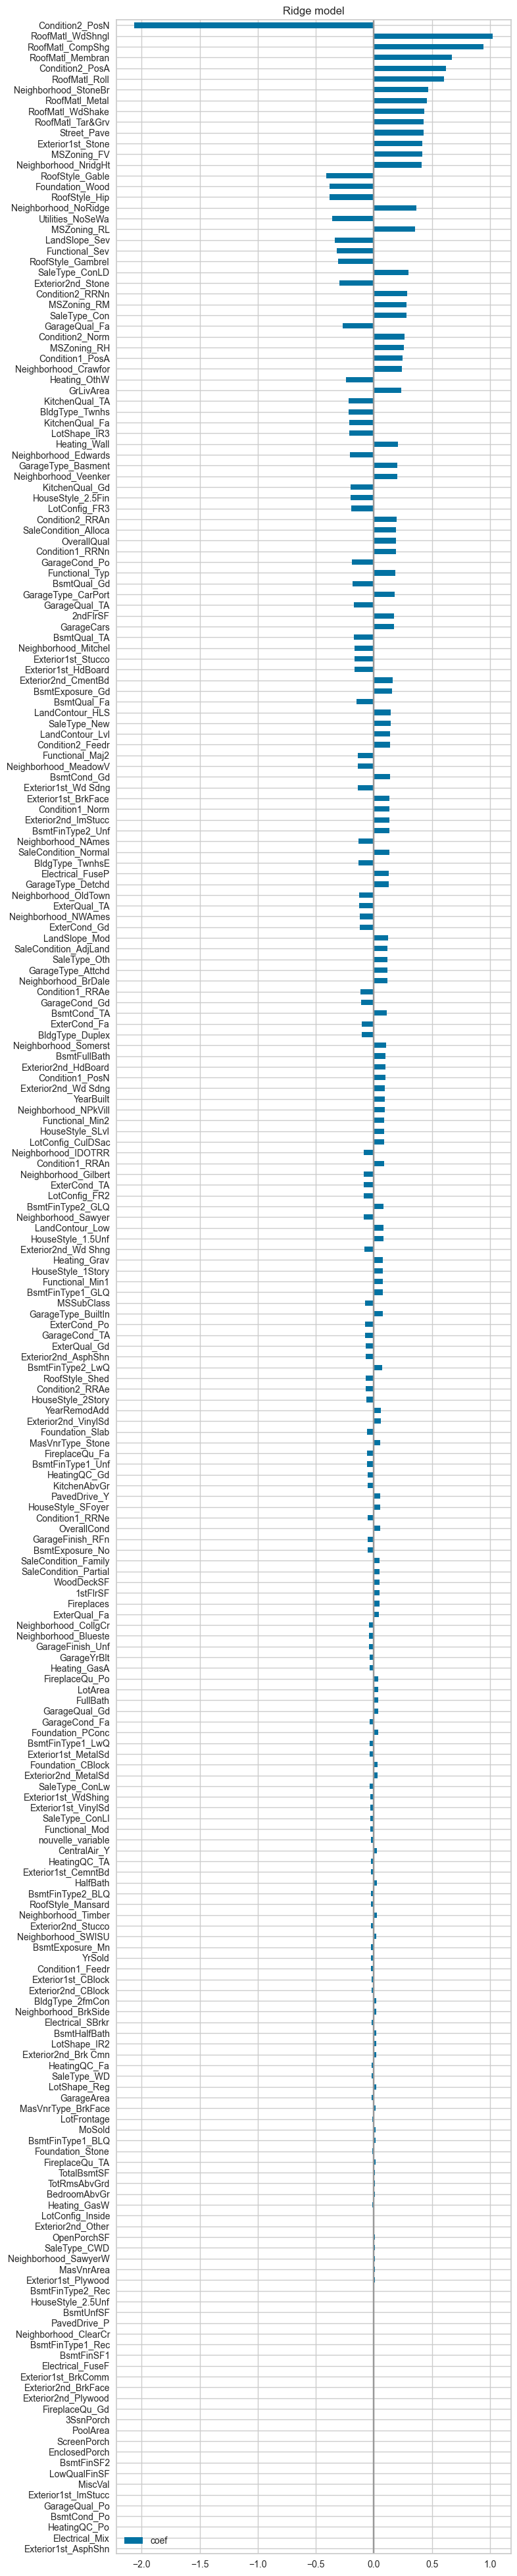

In [23]:
#### RIDGE
reg_ridge_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.Ridge()),
                          ])

param_grid = {
    "regressor__alpha": [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_ridge_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_ridge_model = grid_search.best_estimator_.named_steps["regressor"]
best_ridge_model

df_feature_importance = pd.DataFrame(best_ridge_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 50))
)
plt.title("Ridge model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


# Train and evaluate ridge regression

ridge_results = train_model(model=reg_ridge_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)

ridge_pipe = ridge_results["estimator"]

# get performances in train & test
Ridge_model_result_all = get_all_performances(values_train=(Y_train, ridge_pipe.predict(X_train)),
                     values_test=(Y_test, ridge_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Ridge_model_result_all
print(f"l'optimisation des hyperparamètresnous permet de sélectionner la meilleure valeur du coefficient donnée par {best_ridge_model}")

En considérant le R², le modèle Ridge performe plus que le modèle linéaire même si elle a une erreur MAE plus élevée. Aussi, au regard de la valeur du max_error, nous pouvons retenir aussi le modèle Ridge au détriment du modèle simple puisque l'erreur maximale que l'on puisse commettre en faisant la prédition avec Ridge est plus faible que celui du modèle simple.

 <h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.1.3 Regression Lasso </h5> 

In [24]:
#### Lasso
reg_lasso_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.Lasso()),
                          ])

param_grid = {
    "regressor__alpha": [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_lasso_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_lasso_model = grid_search.best_estimator_.named_steps["regressor"]
print(f"l'optimisation des hyperparamètres nous permet de sélectionner la meilleure valeur du coefficient donnée par {best_lasso_model}")

Best params: {'regressor__alpha': 0.001, 'regressor__fit_intercept': True}
l'optimisation des hyperparamètres nous permet de sélectionner la meilleure valeur du coefficient donnée par Lasso(alpha=0.001)


Shape: (236, 1)


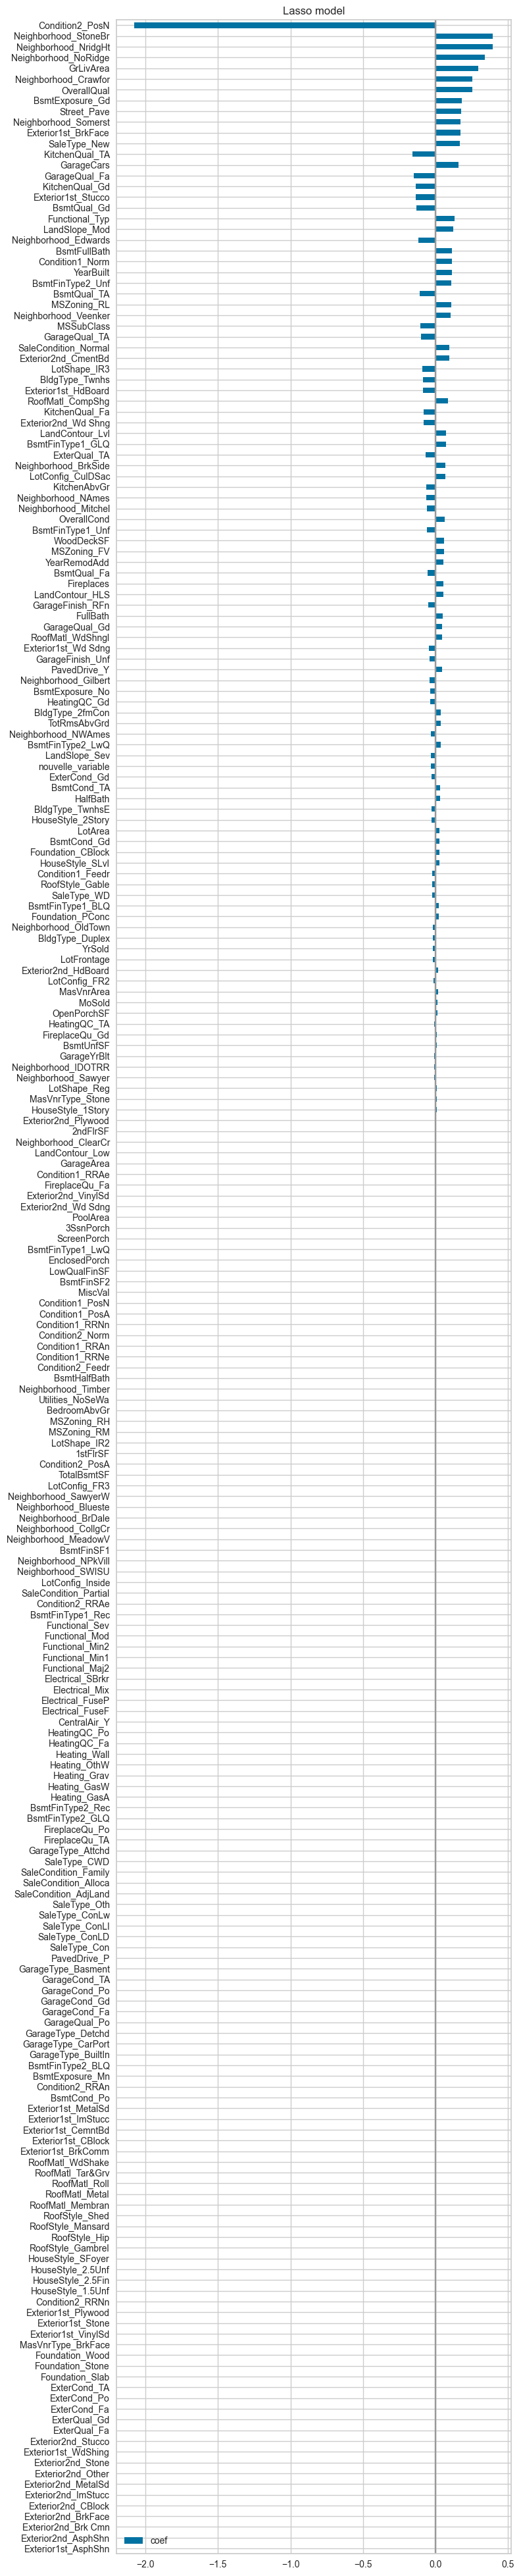

In [25]:
df_feature_importance = pd.DataFrame(best_lasso_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 50))
)
plt.title("Lasso model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [26]:
#Train and evaluate lasso regression
lasso_results = train_model(model=reg_lasso_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)
lasso_pipe = lasso_results["estimator"]
# get performances in train & test
Lasso_model_result_all = get_all_performances(values_train=(Y_train, lasso_pipe.predict(X_train)),
                     values_test=(Y_test, lasso_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Lasso_model_result_all

Model error: 0.76244


,metric,train,test
0,r2_score,2.940386e-02,3.435163e-02
1,mean_squared_error,6.695521e-01,7.252979e-01
2,mean_absolute_percentage_error,1.534549e+12,3.031712e+12
3,max_error,3.080025e+00,2.893082e+00


Selon le critère du R², le modèle Ridge est préféré au modèle Lasso, cette conclusion  reste valabe  si nous passons au critère du max_error.

 <h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.1.4 Elastic Net </h5>

In [ ]:
### ELASTIC-NET 
#le choix des hyperparamètres étant instruit par la littérature.
reg_elastic_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.ElasticNet()),
                          ])
param_grid = {
    "regressor__alpha": [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__l1_ratio" : [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_elastic_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_elastic_net_model = grid_search.best_estimator_.named_steps["regressor"]
best_elastic_net_model

In [ ]:
df_feature_importance = pd.DataFrame(best_elastic_net_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 50))
)
plt.title("Elastic-net model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [ ]:
# Train and evaluate elastic_net regression

elastic_results = train_model(model=reg_elastic_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)

elastic_pipe = elastic_results["estimator"]

# get performances in train & test
Elastic_net_model_result_all = get_all_performances(values_train=(Y_train, elastic_pipe.predict(X_train)),
                     values_test=(Y_test, elastic_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Elastic_net_model_result_all

Le modèle Ridge est toujours le meilleur car il présente un R² supérieur à celui du modèle avec Elastic net.

<h4 style="text-align:justify; background-color:RGB(51,165,182);font-size:20px;font-family:Roboto"> III.1.2 Méthodes ensemblistes</h4> 

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.2.1 Random Forest Regressor</h5>

In [ ]:
rf_reg = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", RandomForestRegressor()),
                          ]
                   )
rf_reg

In [177]:
rf_results = train_model(model=rf_reg,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

rf_estimator = rf_results["estimator"]
rf_estimator
#get performances in train & test
Random_forest_model_result_all = get_all_performances(values_train=(Y_train, rf_estimator.predict(X_train)),
                     values_test=(Y_test, rf_estimator.predict(X_test)),
                     metrics=METRICS
                    )
Random_forest_model_result_all

Model error: 1.34659


,metric,train,test
0,r2_score,9.799896e-01,8.781758e-01
1,mean_squared_error,1.380392e-02,9.150206e-02
2,mean_absolute_percentage_error,3.491378e+10,3.406080e+12
3,max_error,8.656637e-01,1.420986e+00


Le modèle a fait du sur-apprentissage ce qui nécessite une simplification des variables utilisées. Cela fera l'objet de la partie qui suivra avec l'utilisation des variables d'intérêt.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.1.2.2 Decision trees </h5>

In [183]:
dt_reg = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", DecisionTreeRegressor()),
                          ]
                   )
dt_reg

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor', DecisionTreeRegressor())])

In [184]:
dt_results = train_model(model=dt_reg,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

dt_estimator = dt_results["estimator"]
dt_estimator

# get performances in train & test
Decision_trees_model_result_all=get_all_performances(values_train=(Y_train, dt_estimator.predict(X_train)),
                     values_test=(Y_test, dt_estimator.predict(X_test)),
                     metrics=METRICS)
Decision_trees_model_result_all

Model error: 1.47122


,metric,train,test
0,r2_score,1.000000e+00,8.005950e-01
1,mean_squared_error,8.038664e-36,1.497730e-01
2,mean_absolute_percentage_error,4.090295e-19,4.176475e+12
3,max_error,5.551115e-17,2.422360e+00


On remarque que le modèle sur-apprend. Ceci est dû au fait que le nombre des variables explicatives est très élevé. Ceci étant une limite du R² qui augmente mécaniquement avec l'augmentation du nombre de variables explicatives même si ces dernières n'apportent plus d'informations pertinentes. Ceci nous amène à réduire le nombre de variables en ne retenant que les variables les plus pertinente possibles pour nos différents modèles.

<h3 style="text-align:justify; background-color:RGB(51,165,182);font-size:25px;font-family:Roboto"> III.2 Jeu de données traité avec variables pertinentes </h3>

In [191]:
## création de deux groupes de variables 
## les variables qualitatives et les variables quantitatives
## groupe des variables quantitatives
var_num = pd.DataFrame(file_train.select_dtypes(include="number"))
## groupe des variables qualitatives
var_Qual = pd.DataFrame(file_train.select_dtypes(include="object"))

<h4 style="text-align:justify; background-color:RGB(51,165,182);font-size:20px;font-family:Roboto"> III.2.1 Encodage des variables qualitatives</h4> 
* Encodage de la variable  par la methode du one hot encoding 

In [192]:
## encodage des variable  qualitatives 
var_Qual_Encode = pd.get_dummies(var_Qual)
vecteur = range(len(var_num))
var_Qual_Encode = var_Qual_Encode.assign(nouvelle_variable = vecteur)
var_Qual_Encode = var_Qual_Encode.astype(int)
print(f'var_Qual_Encode.shape: {var_Qual_Encode.shape}')
var_Qual_Encode.head()

var_Qual_Encode.shape: (1438, 239)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,nouvelle_variable
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3
4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4


In [193]:
var_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [194]:
var_num = pd.DataFrame(var_num, columns= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'])
var_num = var_num.assign(nouvelle_variable = vecteur)
print(f'var_num_standar.shape:{var_num.shape}')
var_num.head()

var_num_standar.shape:(1438, 38)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,nouvelle_variable
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4


In [195]:
## jointure de var_num_standar et var_Qual_Encode pour creer la base final pour la modélisation 
final_data = pd.merge(var_num, var_Qual_Encode, on='nouvelle_variable')
print(f'dimensions des données finales :{final_data.shape}')
final_data.head()

dimensions des données finales :(1438, 276)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,nouvelle_variable,MSZoning_C (all),MSZoning_FV,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [199]:
final_data.drop('nouvelle_variable', axis = 1)
print(f'dimensions des données finales :{final_data.shape}')
final_data.head()# Suppression de la colonne de jointure

dimensions des données finales :(1438, 276)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,nouvelle_variable,MSZoning_C (all),MSZoning_FV,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [200]:
print(f'dimensions des données finales :{final_data.shape}')
final_data.head()

dimensions des données finales :(1438, 276)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,nouvelle_variable,MSZoning_C (all),MSZoning_FV,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Nous allons à présent pouvoir analyser les variables les plus corrélées à SalePrice (soit les variables qui ont une corrélation de plus de 0.2 en valeur absolue avec la variable SalesPrices) et réaliser une feature selection pour ne garder que les meilleures. A la suite,on teste la correlation entre les variables explicatives retenues. On a supprimé les variables 'GarageYrBlt','GarageCars','YearRemodAdd', '1stFlrSF' qui sont correlé à plus de 0.65 avec certaines autres variables.Leur suppression se justifie au fait que dans la modelisation, il faut que les variables explicatives ne soient pas multicolineaires.

In [273]:
corr_train = final_data.corr()
# Suppression des variables dont le coefficient de corrélation avec la variable cible en valeur absolue, est inférieur à 0.2.
nocorr_features = list(corr_train[abs(corr_train['SalePrice'])<0.2].index)
nocorr_features
final_train = final_data.drop(nocorr_features, axis=1)
final_train.head()
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1438 non-null   float64
 1   LotArea                1438 non-null   int64  
 2   OverallQual            1438 non-null   int64  
 3   YearBuilt              1438 non-null   int64  
 4   YearRemodAdd           1438 non-null   int64  
 5   MasVnrArea             1438 non-null   float64
 6   BsmtFinSF1             1438 non-null   int64  
 7   BsmtUnfSF              1438 non-null   int64  
 8   TotalBsmtSF            1438 non-null   int64  
 9   1stFlrSF               1438 non-null   int64  
 10  2ndFlrSF               1438 non-null   int64  
 11  GrLivArea              1438 non-null   int64  
 12  BsmtFullBath           1438 non-null   int64  
 13  FullBath               1438 non-null   int64  
 14  HalfBath               1438 non-null   int64  
 15  TotR

In [215]:
## séparation du dataset en variables explicatives et variable cible.
Variable_expliquee = final_train['SalePrice']
Variable_explicatives = final_train.drop('SalePrice', axis = 1)

In [216]:
Variable_explicatives

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,HouseStyle_2Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_Ex,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,8,0,2003.0,2,548,0,61,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,6,1,1976.0,2,460,298,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,6,1,2001.0,2,608,0,42,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,7,1,1998.0,3,642,0,35,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,9,1,2000.0,3,836,192,84,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,62.0,7917,6,1999,2000,0.0,0,953,953,953,694,1647,0,2,1,7,1,1999.0,2,460,0,40,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0
1434,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,0,2073,1,2,0,7,2,1978.0,2,500,349,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0
1435,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,1152,2340,0,2,0,9,2,1941.0,1,252,0,60,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0
1436,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,0,1078,1,1,0,5,0,1950.0,1,240,366,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0


Nous utilisons les variables corrélées entre elles. Ceci dans le but d'éviter la multicolinéarité entre les variables explicatives transformées.

In [217]:
 #Suppression des variables coréllées entre elles
Variable_explicatives=Variable_explicatives.drop(columns=['GarageYrBlt','GarageCars','YearRemodAdd', '1stFlrSF'
, '2ndFlrSF', 'BsmtFinSF1', 'TotRmsAbvGrd'], axis=True)

In [218]:
Variable_explicatives

,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,HouseStyle_2Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_Ex,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleCondition_Partial
0,65.0,8450,7,2003,196.0,150,856,1710,1,2,1,0,548,0,61,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,80.0,9600,6,1976,0.0,284,1262,1262,0,2,0,1,460,298,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0
2,68.0,11250,7,2001,162.0,434,920,1786,1,2,1,1,608,0,42,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
3,60.0,9550,7,1915,0.0,540,756,1717,1,1,0,1,642,0,35,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0
4,84.0,14260,8,2000,350.0,490,1145,2198,1,2,1,1,836,192,84,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,62.0,7917,6,1999,0.0,953,953,1647,0,2,1,1,460,0,40,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0
1434,85.0,13175,6,1978,119.0,589,1542,2073,1,2,0,2,500,349,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0
1435,66.0,9042,7,1941,0.0,877,1152,2340,0,2,0,2,252,0,60,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0
1436,68.0,9717,5,1950,0.0,0,1078,1078,1,1,0,0,240,366,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0


In [224]:
## standardization  de notre variable cible.
scaler = RobustScaler()
Variable_expliquee = Variable_expliquee.values.reshape(-1, 1)
Variable_expliquee = scaler.fit_transform(Variable_expliquee)

In [225]:
Variable_expliquee

array([[ 0.58385093],
       [ 0.2484472 ],
       [ 0.77018634],
       ...,
       [ 1.30434783],
       [-0.24068323],
       [-0.17391304]])

In [226]:
## identification des train_set et test_set
X_train, X_test, Y_train, Y_test = train_test_split(Variable_explicatives, Variable_expliquee, test_size =0.2, random_state = 46 )
print(f'X_train.shape: {X_train.shape}\nX_test.shape:{X_test.shape}\nY_train.shape:{Y_train.shape}\nY_test.shape:{Y_test.shape}')

X_train.shape: (1150, 61)
X_test.shape:(288, 61)
Y_train.shape:(1150, 1)
Y_test.shape:(288, 1)


<h4 style="text-align:justify; background-color:RGB(51,165,182);font-size:20px;font-family:Roboto"> III.2.2 Famille de méthodes du modèle linéaire </h4> 

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.2.1 Modèle de régression multiple</h5>

In [227]:
set_config(display="diagram", print_changed_only=True)

In [228]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
reg_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.LinearRegression()),
                          ]
                   )
# ou via make_pipeline (la seule différence est que make_pipeline génère automatiquement des noms pour les étapes).
# reg_pipe = make_pipeline(StandardScaler(), linear_model.LinearRegression())
reg_pipe

Pipeline(steps=[('scaler', RobustScaler()), ('regressor', LinearRegression())])

In [229]:
# Train and evaluate ridge regression
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.08165


In [230]:
# get performances in train & test
Linear_model_result_var = get_all_performances(values_train=(Y_train, lr_pipe.predict(X_train)),
                     values_test=(Y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS )
Linear_model_result_var

,metric,train,test
0,r2_score,8.330489e-01,8.912985e-01
1,mean_squared_error,1.151689e-01,8.164560e-02
2,mean_absolute_percentage_error,2.885305e+11,1.132471e+12
3,max_error,4.173180e+00,1.377726e+00


On remarque que les performances obtenues sur l'échantillon d'entrainement sont presque égal aux performances de l'échantillon test. De même l’évaluation du modèle à l’aide des métriques tels que MAE, MSE, MAPA  nous donne des performances presque identique sur l’échantillon d’entrainement et l’échantillon test. Au bénéfice, de toutes ces preuves, on retient ce modèle acceptable. Pour savoir s’il est le meilleur ou pas, nous allons passer aux modèles de pénalisations en optimisant des hyperparamètres.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.2.2 Regression Ridge </h5>  
 

Best params: {'regressor__alpha': 0.5, 'regressor__fit_intercept': False}
Shape: (61, 1)
Model error: 0.0816


,metric,train,test
0,r2_score,8.329827e-01,8.913587e-01
1,mean_squared_error,1.152146e-01,8.160040e-02
2,mean_absolute_percentage_error,2.855022e+11,1.130879e+12
3,max_error,4.192323e+00,1.388094e+00


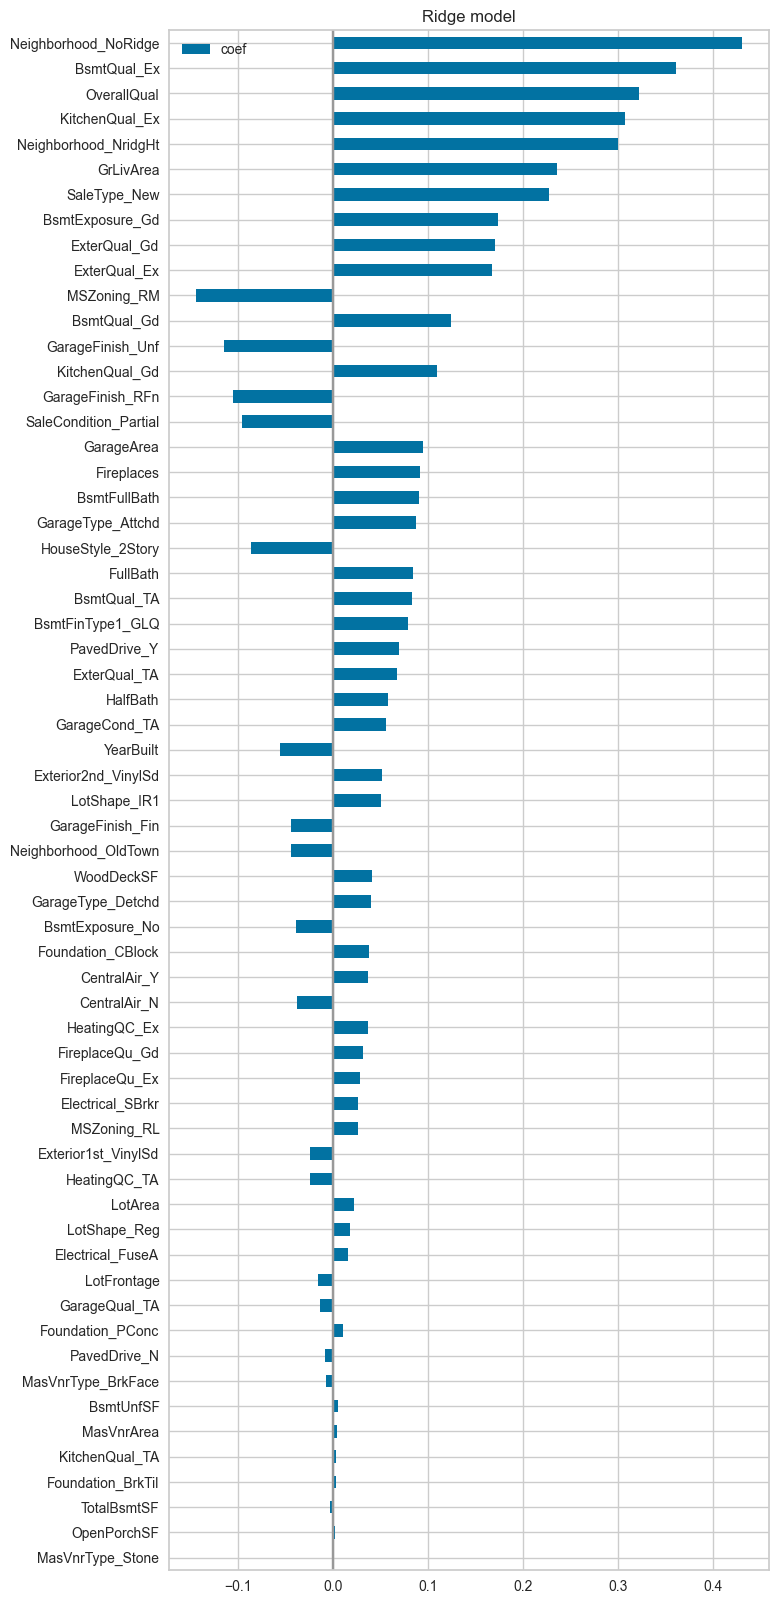

In [232]:
#### RIDGE
reg_ridge_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.Ridge()),
                          ])

param_grid = {
    "regressor__alpha": [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_ridge_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_ridge_model = grid_search.best_estimator_.named_steps["regressor"]
best_ridge_model

df_feature_importance = pd.DataFrame(best_ridge_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 20))
)
plt.title("Ridge model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


# Train and evaluate ridge regression

ridge_results = train_model(model=reg_ridge_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)

ridge_pipe = ridge_results["estimator"]

# get performances in train & test
Ridge_model_result_var = get_all_performances(values_train=(Y_train, ridge_pipe.predict(X_train)),
                     values_test=(Y_test, ridge_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Ridge_model_result_var

En considérant le R², le modèle Ridge performe plus que le modèle linéaire même si elle a une erreur MAE plus élevée. Aussi, au regard de la valeur du max_error, nous pouvons retenir aussi le modèle Ridge au détriment du modèle simple puisque l'erreur maximale que l'on puisse commettre en faisant la prédition avec Ridge est plus faible que celui du modèle simple.On retient alors que l'optimisation des hyperparamètres nous permet d'ameliorer la performance de notre modèle.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.2.3 Regression Lasso </h5>  

In [233]:
#### Lasso
reg_lasso_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.Lasso()),
                          ])

param_grid = {
    "regressor__alpha": [0.01, 0.001, 0.0001, 0.1, 0.2, 0.3, 0.5],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_lasso_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_lasso_model = grid_search.best_estimator_.named_steps["regressor"]
best_lasso_model

Best params: {'regressor__alpha': 0.001, 'regressor__fit_intercept': False}


Lasso(alpha=0.001, fit_intercept=False)

Shape: (61, 1)


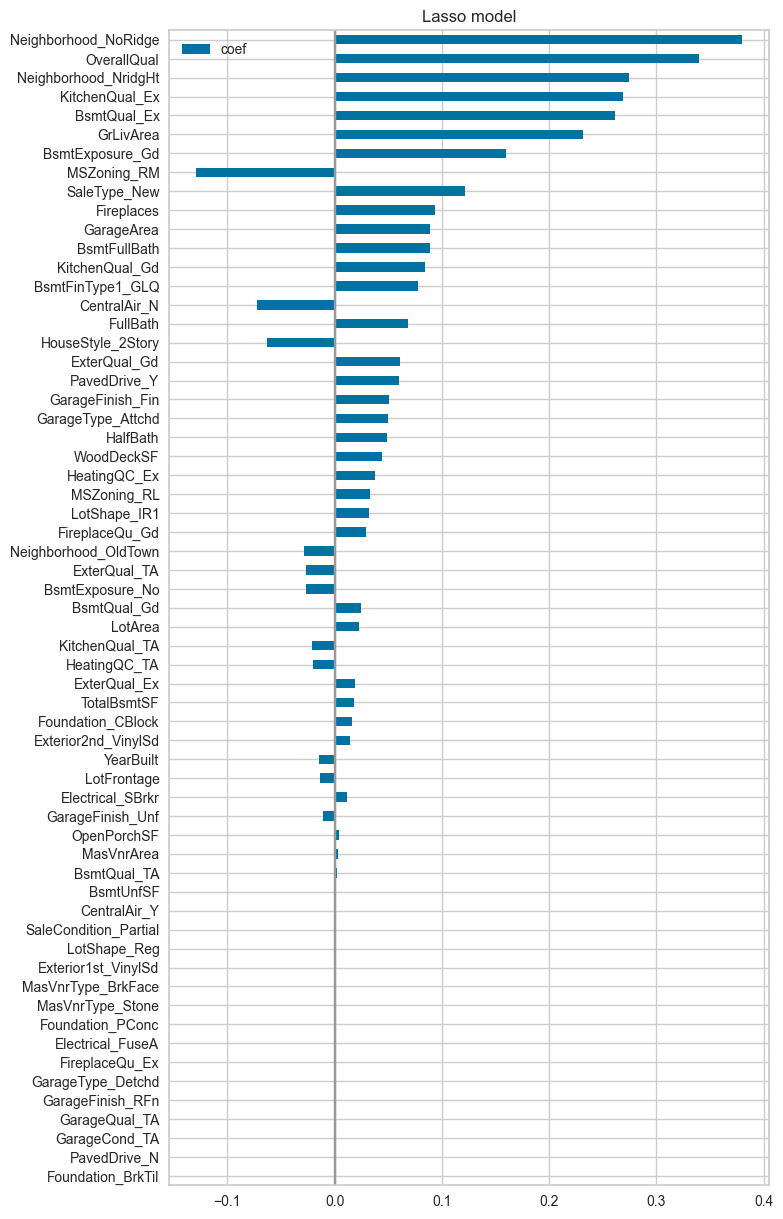

In [235]:
df_feature_importance = pd.DataFrame(best_lasso_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 15))
)
plt.title("Lasso model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


In [236]:
#Train and evaluate lasso regression

lasso_results = train_model(model=reg_lasso_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)

lasso_pipe = lasso_results["estimator"]

# get performances in train & test
Lasso_model_result_var=get_all_performances(values_train=(Y_train, lasso_pipe.predict(X_train)),
                     values_test=(Y_test, lasso_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Lasso_model_result_var

Model error: 0.7511


,metric,train,test
0,r2_score,0.000000e+00,-6.598919e-06
1,mean_squared_error,6.898360e-01,7.511044e-01
2,mean_absolute_percentage_error,6.995802e+11,2.793462e+12
3,max_error,2.974131e+00,2.908318e+00


En se referant au critère du R², le modèle Ridge est préférable  au modèle Lasso car la part de variabilité des prix de maisons expliquée par les variables explicatives dans le modèle Ridge est superieur à celle expliqué dans le modèle Lasso.Comme vu, dans le cours cela n'est pas suffisant pour conclure de la performance des modèle, ce qui nous pousse à regarder les autres metriques d'evaluations des modèles.L'analyse des MAE montre que l'erreur maximal qu'on puisse commettre dans le modèle Ridge est inferieur à celle du modèle Lasso.On peut alors preferé le modèle Ridge au Lasso.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.2.4 Elastic Net </h5>

In [237]:
### ELASTIC-NET

reg_elastic_pipe = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", linear_model.ElasticNet()),
                          ])

param_grid = {
    "regressor__alpha": [0.1, 0.2, 0.3, 0.5],
    "regressor__l1_ratio" : [0.5, 0.3, 0.7],
    "regressor__fit_intercept" : [True, False]
}

grid_search = GridSearchCV(reg_elastic_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

best_elastic_net_model = grid_search.best_estimator_.named_steps["regressor"]
best_elastic_net_model



Best params: {'regressor__alpha': 0.1, 'regressor__fit_intercept': False, 'regressor__l1_ratio': 0.3}


ElasticNet(alpha=0.1, fit_intercept=False, l1_ratio=0.3)

Shape: (61, 1)


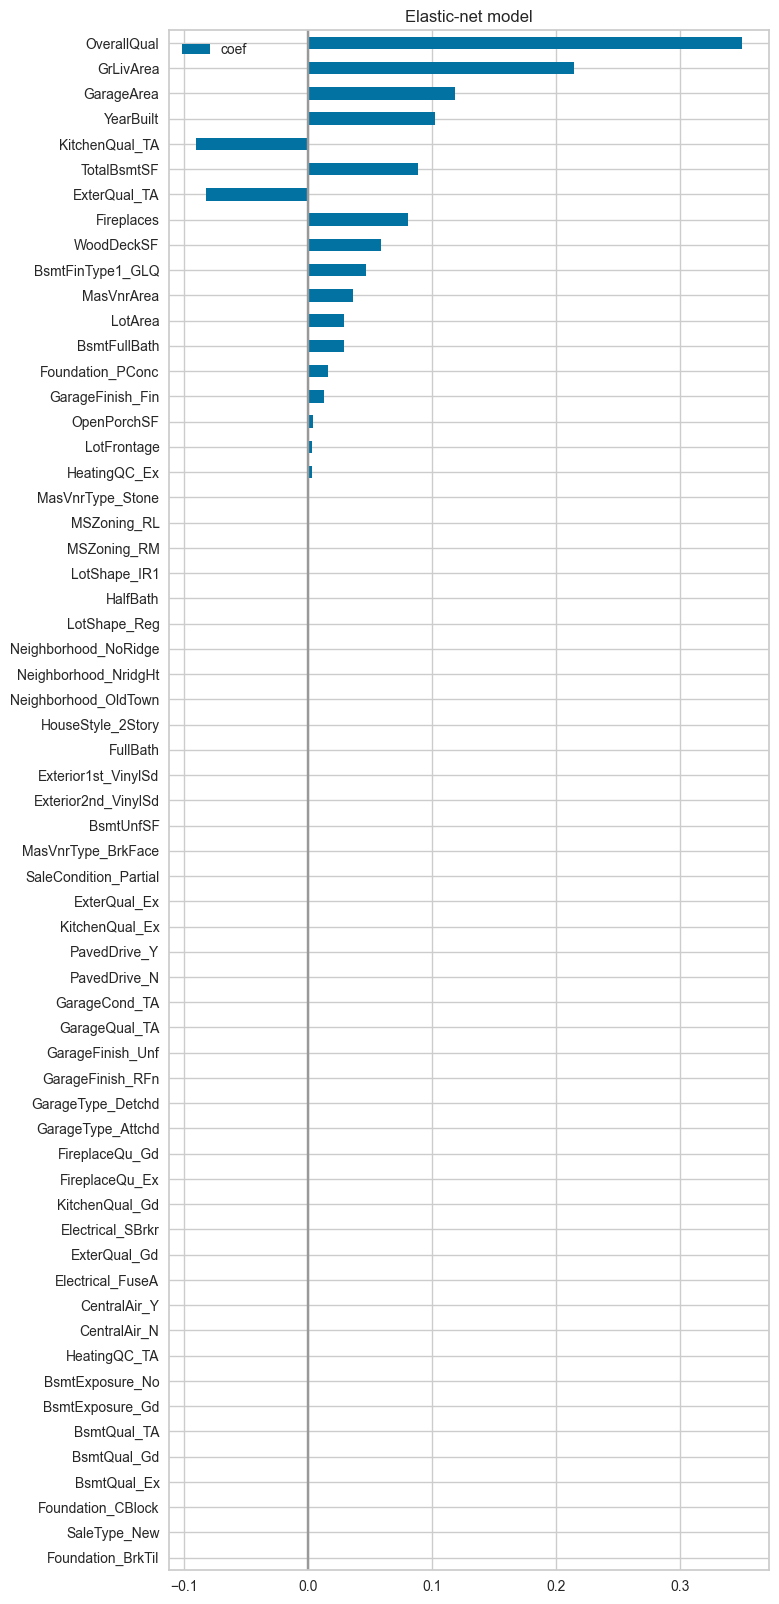

In [238]:
df_feature_importance = pd.DataFrame(best_elastic_net_model.coef_.T, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 20))
)
plt.title("Elastic-net model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);



In [239]:
# Train and evaluate elastic_net regression

elastic_results = train_model(model=reg_elastic_pipe, x_train=X_train,
                         y_train=Y_train, x_test=X_test,
                         y_test=Y_test)

elastic_pipe = elastic_results["estimator"]

# get performances in train & test
Elastic_net_model_result_var=get_all_performances(values_train=(Y_train, elastic_pipe.predict(X_train)),
                     values_test=(Y_test, elastic_pipe.predict(X_test)),
                     metrics=METRICS
                    )
Elastic_net_model_result_var

Model error: 0.75111


,metric,train,test
0,r2_score,1.738327e-03,1.707743e-03
1,mean_squared_error,6.886368e-01,7.498167e-01
2,mean_absolute_percentage_error,6.988249e+11,2.797070e+12
3,max_error,2.972972e+00,2.907080e+00


Tout comme dans les conclusions, le modèle Ridge presente un R² supérieur à celui du modèle avec Elastic net.L'analyse des autres metriques d'evaluations montre que le MSE du Ridge reste supereiur à celui de Elastic net.Cependant,le MAE,MASE de Elastic net sont infereiurs à celui du Ridge.Pour mieux detecter le meilleur modèle, nous nous dirigeons vers les modèles ensemblistes.

<h4 style="text-align:justify; background-color:RGB(51,165,182);font-size:20px;font-family:Roboto"> III.2.3 Méthodes ensemblistes </h4> 

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.3.1 Random Forest Regressor </h5>

In [241]:
rf_reg = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", RandomForestRegressor()),
                          ]
                   )
rf_reg

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor', RandomForestRegressor())])

In [242]:
rf_results = train_model(model=rf_reg,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

rf_estimator = rf_results["estimator"]
rf_estimator
#get performances in train & test
Random_forest_model_result_var=get_all_performances(values_train=(Y_train, rf_estimator.predict(X_train)),
                     values_test=(Y_test, rf_estimator.predict(X_test)),
                     metrics=METRICS
                    )
Random_forest_model_result_var

Model error: 1.34593


,metric,train,test
0,r2_score,9.783809e-01,8.613763e-01
1,mean_squared_error,1.491364e-02,1.041202e-01
2,mean_absolute_percentage_error,6.946076e+10,3.128759e+12
3,max_error,7.876827e-01,1.733356e+00


On remarque que le modèle obtient de très grande performance en train et en test mais avec un ecart de 0.11 points  On est tenté de dire que le modèle a fait du sur-apprentissage ce qui nécessite une simplification des variables utilisées malgré notre processing.

<h5 style="text-align:justify; background-color:RGB(51,165,182);font-size:15px;font-family:Roboto"> III.2.3.2 Decision trees </h5>  

In [243]:
dt_reg = Pipeline(steps=[("scaler", RobustScaler()),
                           ("regressor", DecisionTreeRegressor()),
                          ]
                   )
dt_reg

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor', DecisionTreeRegressor())])

In [244]:
dt_results = train_model(model=dt_reg,
                       x_train=X_train, y_train=Y_train,
                       x_test=X_test, y_test=Y_test)

dt_estimator = dt_results["estimator"]
dt_estimator

# get performances in train & test
Decision_trees_model_result_var=get_all_performances(values_train=(Y_train, dt_estimator.predict(X_train)),
                     values_test=(Y_test, dt_estimator.predict(X_test)),
                     metrics=METRICS)
Decision_trees_model_result_var

Model error: 1.45308


,metric,train,test
0,r2_score,0.999993,6.443553e-01
1,mean_squared_error,0.000005,2.671245e-01
2,mean_absolute_percentage_error,0.000420,4.137624e+12
3,max_error,0.046584,2.540373e+00


On remarque que le modèle sur-apprend car il donne un R2 presque égale à 1 au test et donne un R2 egal à 0.62 au test soit un ecart de 0.37 points ce qui est énorme.Les memes remarques sont faites au niveau des metriques MSE et MAE avec de bonnes performances à l'entrainement mais des performances mauvaises au test.Tout ceci nous montre que malgré, la selection des variables jugées pertinentes, le modèle fait toujours du surapprentissage.A l'etat actuel on ne peut pas choisir ce modèle pour nos predictions.

<h2 style="text-align:justify; background-color:RGB(51,165,182);font-size:30px;font-family:Roboto"> IV - Validation des modèle </h2>

<h3 style="text-align:justify; background-color:RGB(51,165,182);font-size:25px;font-family:Roboto"> Comparaison des models </h3>

In [245]:
#Dataframe contenant tous les résultats des modèles.
all_results = pd.concat([Linear_model_result_all, Ridge_model_result_all,
                         Lasso_model_result_all,
                         Elastic_net_model_result_all,
                         Random_forest_model_result_all,
                         Decision_trees_model_result_all,
                         Linear_model_result_var,
                         Ridge_model_result_var,
                         Lasso_model_result_var,
                         Elastic_net_model_result_var,
                         Random_forest_model_result_var,
                         Decision_trees_model_result_var], keys=['Linear_all', 'Ridge_all',
                         'Lasso_all',
                         'Elastic_net_all',
                         'Random_forest_all',
                         'Decision_trees_all',
                         'Linear_var',
                         'Ridge_var',
                         'Lasso_var',
                         'Elastic_net_var',
                         'Random_forest_var',
                         'Decision_trees_var'], names=['Models'])
all_results

metric         train  \
Models                                                               
Linear_all         0                        r2_score  9.417629e-01   
                   1              mean_squared_error  4.017405e-02   
                   2  mean_absolute_percentage_error  1.206280e+11   
                   3                       max_error  1.460771e+00   
Ridge_all          0                        r2_score  9.132913e-01   
                   1              mean_squared_error  5.981477e-02   
                   2  mean_absolute_percentage_error  6.775150e+11   
                   3                       max_error  2.411140e+00   
Lasso_all          0                        r2_score  2.940386e-02   
                   1              mean_squared_error  6.695521e-01   
                   2  mean_absolute_percentage_error  1.534549e+12   
                   3                       max_error  3.080025e+00   
Elastic_net_all    0                        r2_score  3.299325e-02   
                   1              mean_squared_error  6.670761e-01   
                   2  mean_absolute_percentage_error  1.639319e+12   
                   3                       max_error  3.103572e+00   
Random_forest_all  0                        r2_score  9.799896e-01   
                   1              mean_squared_error  1.380392e-02   
                   2  mean_absolute_percentage_error  3.491378e+10   
                   3                       max_error  8.656637e-01   
Decision_trees_all 0                        r2_score  1.000000e+00   
                   1              mean_squared_error  8.038664e-36   
                   2  mean_absolute_percentage_error  4.090295e-19   
                   3                       max_error  5.551115e-17   
Linear_var         0                        r2_score  8.330489e-01   
                   1              mean_squared_error  1.151689e-01   
                   2  mean_absolute_percentage_error  2.885305e+11   
                   3                       max_error  4.173180e+00   
Ridge_var          0                        r2_score  8.329827e-01   
                   1              mean_squared_error  1.152146e-01   
                   2  mean_absolute_percentage_error  2.855022e+11   
                   3                       max_error  4.192323e+00   
Lasso_var          0                        r2_score  0.000000e+00   
                   1              mean_squared_error  6.898360e-01   
                   2  mean_absolute_percentage_error  6.995802e+11   
                   3                       max_error  2.974131e+00   
Elastic_net_var    0                        r2_score  1.738327e-03   
                   1              mean_squared_error  6.886368e-01   
                   2  mean_absolute_percentage_error  6.988249e+11   
                   3                       max_error  2.972972e+00   
Random_forest_var  0                        r2_score  9.783809e-01   
                   1              mean_squared_error  1.491364e-02   
                   2  mean_absolute_percentage_error  6.946076e+10   
                   3                       max_error  7.876827e-01   
Decision_trees_var 0                        r2_score  9.999930e-01   
                   1              mean_squared_error  4.847505e-06   
                   2  mean_absolute_percentage_error  4.196579e-04   
                   3                       max_error  4.658385e-02   

                              test  
Models                              
Linear_all         0  8.072001e-01  
                   1  1.448119e-01  
                   2  8.157957e+11  
                   3  4.657638e+00  
Ridge_all          0  8.885010e-01  
                   1  8.374681e-02  
                   2  2.960895e+11  
                   3  1.973088e+00  
Lasso_all          0  3.435163e-02  
                   1  7.252979e-01  
                   2  3.031712e+12  
                   3  2.893082e+00  
Elastic_net_all    0  3.490

In [246]:
#Comparaison des modèles par rapport aux mean_absolute_percentage_error
all_results[all_results['metric']=='mean_absolute_percentage_error'].sort_values(by='test')

,,metric,train,test
Models,,,,
Ridge_all,2,mean_absolute_percentage_error,6.775150e+11,2.960895e+11
Linear_all,2,mean_absolute_percentage_error,1.206280e+11,8.157957e+11
Ridge_var,2,mean_absolute_percentage_error,2.855022e+11,1.130879e+12
Linear_var,2,mean_absolute_percentage_error,2.885305e+11,1.132471e+12
Lasso_var,2,mean_absolute_percentage_error,6.995802e+11,2.793462e+12
Elastic_net_var,2,mean_absolute_percentage_error,6.988249e+11,2.797070e+12
Elastic_net_all,2,mean_absolute_percentage_error,1.639319e+12,3.009811e+12
Lasso_all,2,mean_absolute_percentage_error,1.534549e+12,3.031712e+12
Random_forest_var,2,mean_absolute_percentage_error,6.946076e+10,3.128759e+12


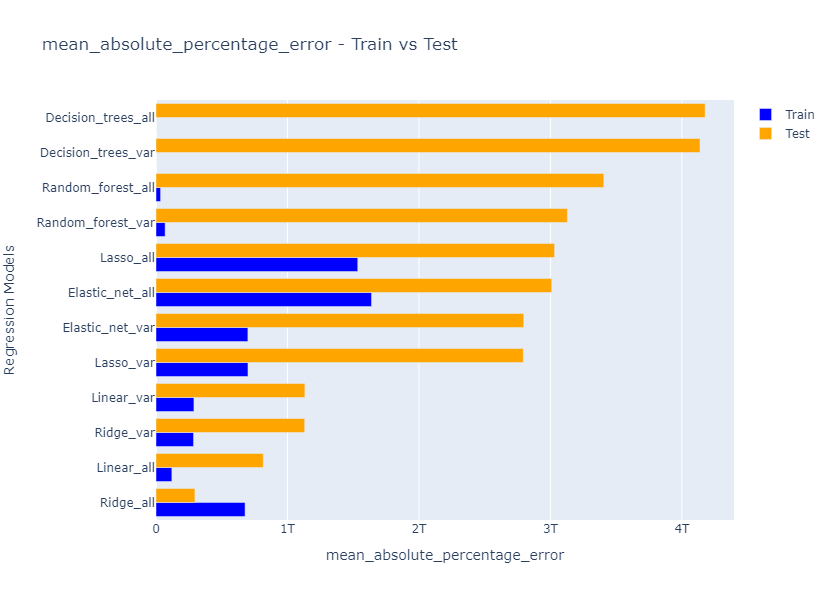

In [258]:
# Filtrer les résultats pour la métrique "mean_squared_error"
mse_results = all_results[all_results['metric'] == 'mean_absolute_percentage_error'].sort_values(by='test')

# Créer un graphique avec Plotly Express
fig = go.Figure()

# Ajouter les barres pour le train
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['train'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Train',
    marker_color='blue',
    orientation='h'  # Utiliser une orientation horizontale
))

# Ajouter les barres pour le test
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['test'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Test',
    marker_color='orange',
    orientation='h'  # Utiliser une orientation horizontale
))

# Mise en forme du graphique
fig.update_layout(
    barmode='group',
    title='mean_absolute_percentage_error - Train vs Test',
    xaxis_title='mean_absolute_percentage_error',
    yaxis_title='Regression Models',
    height=600, 
    width=800
)

# Afficher le graphique
fig.show()


In [259]:
all_results[all_results['metric']=='r2_score'].sort_values(by='train')

,,metric,train,test
Models,,,,
Lasso_var,0,r2_score,0.000000,-0.000007
Elastic_net_var,0,r2_score,0.001738,0.001708
Lasso_all,0,r2_score,0.029404,0.034352
Elastic_net_all,0,r2_score,0.032993,0.034904
Ridge_var,0,r2_score,0.832983,0.891359
Linear_var,0,r2_score,0.833049,0.891299
Ridge_all,0,r2_score,0.913291,0.888501
Linear_all,0,r2_score,0.941763,0.807200
Random_forest_var,0,r2_score,0.978381,0.861376


In [260]:
#Comparaison des modèles par rapport aux r2_score
all_results[all_results['metric']=='r2_score'].sort_values(by='test')

,,metric,train,test
Models,,,,
Lasso_var,0,r2_score,0.000000,-0.000007
Elastic_net_var,0,r2_score,0.001738,0.001708
Lasso_all,0,r2_score,0.029404,0.034352
Elastic_net_all,0,r2_score,0.032993,0.034904
Decision_trees_var,0,r2_score,0.999993,0.644355
Decision_trees_all,0,r2_score,1.000000,0.800595
Linear_all,0,r2_score,0.941763,0.807200
Random_forest_var,0,r2_score,0.978381,0.861376
Random_forest_all,0,r2_score,0.979990,0.878176


In [261]:
all_results[all_results['metric']=='r2_score'].sort_values(by='train')

,,metric,train,test
Models,,,,
Lasso_var,0,r2_score,0.000000,-0.000007
Elastic_net_var,0,r2_score,0.001738,0.001708
Lasso_all,0,r2_score,0.029404,0.034352
Elastic_net_all,0,r2_score,0.032993,0.034904
Ridge_var,0,r2_score,0.832983,0.891359
Linear_var,0,r2_score,0.833049,0.891299
Ridge_all,0,r2_score,0.913291,0.888501
Linear_all,0,r2_score,0.941763,0.807200
Random_forest_var,0,r2_score,0.978381,0.861376


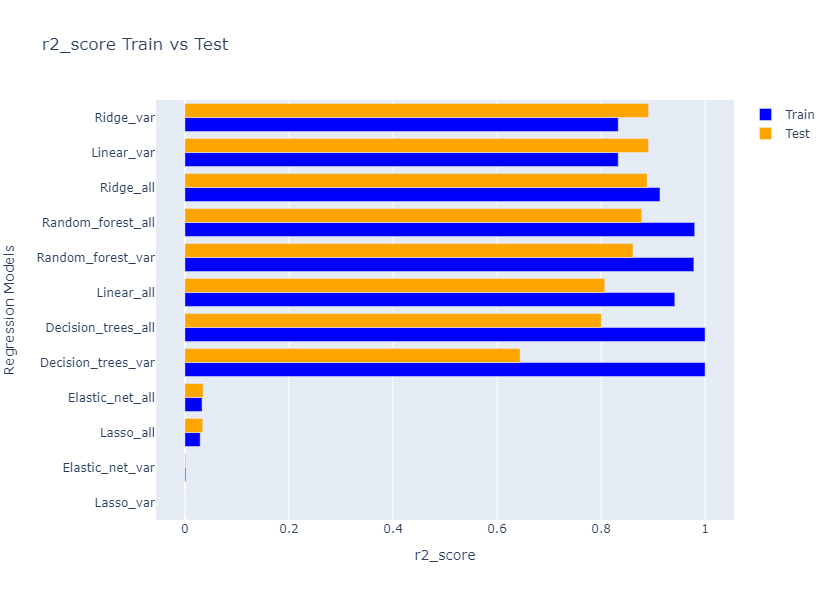

In [262]:
# Filtrer les résultats pour la métrique "r2_score"
mse_results = all_results[all_results['metric'] == 'r2_score'].sort_values(by='test')

# Créer un graphique avec Plotly Express
fig = go.Figure()

# Ajouter les barres pour le train
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['train'].values,  
    name='Train',
    marker_color='blue',
    orientation='h'
))

# Ajouter les barres pour le test
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['test'].values,  
    name='Test',
    marker_color='orange',
    orientation='h' 
))

# Mise en forme du graphique
fig.update_layout(
    barmode='group',
    title='r2_score Train vs Test',
    xaxis_title='r2_score',
    yaxis_title='Regression Models',
    height=600, 
    width=800
)

# Afficher le graphique
fig.show()


Le R² pour le modèle linéaire, on le voit bien n'a aucun sens pour les données de test. ce modèle n'est donc pas valable. 

In [263]:
#Comparaison des modèles par rapport aux mean_squared_error
all_results[all_results['metric']=='mean_squared_error'].sort_values(by='test')

,,metric,train,test
Models,,,,
Ridge_var,1,mean_squared_error,1.152146e-01,0.081600
Linear_var,1,mean_squared_error,1.151689e-01,0.081646
Ridge_all,1,mean_squared_error,5.981477e-02,0.083747
Random_forest_all,1,mean_squared_error,1.380392e-02,0.091502
Random_forest_var,1,mean_squared_error,1.491364e-02,0.104120
Linear_all,1,mean_squared_error,4.017405e-02,0.144812
Decision_trees_all,1,mean_squared_error,8.038664e-36,0.149773
Decision_trees_var,1,mean_squared_error,4.847505e-06,0.267125
Elastic_net_all,1,mean_squared_error,6.670761e-01,0.724883


In [264]:
all_results[all_results['metric']=='mean_squared_error'].sort_values(by='train')

,,metric,train,test
Models,,,,
Decision_trees_all,1,mean_squared_error,8.038664e-36,0.149773
Decision_trees_var,1,mean_squared_error,4.847505e-06,0.267125
Random_forest_all,1,mean_squared_error,1.380392e-02,0.091502
Random_forest_var,1,mean_squared_error,1.491364e-02,0.104120
Linear_all,1,mean_squared_error,4.017405e-02,0.144812
Ridge_all,1,mean_squared_error,5.981477e-02,0.083747
Linear_var,1,mean_squared_error,1.151689e-01,0.081646
Ridge_var,1,mean_squared_error,1.152146e-01,0.081600
Elastic_net_all,1,mean_squared_error,6.670761e-01,0.724883


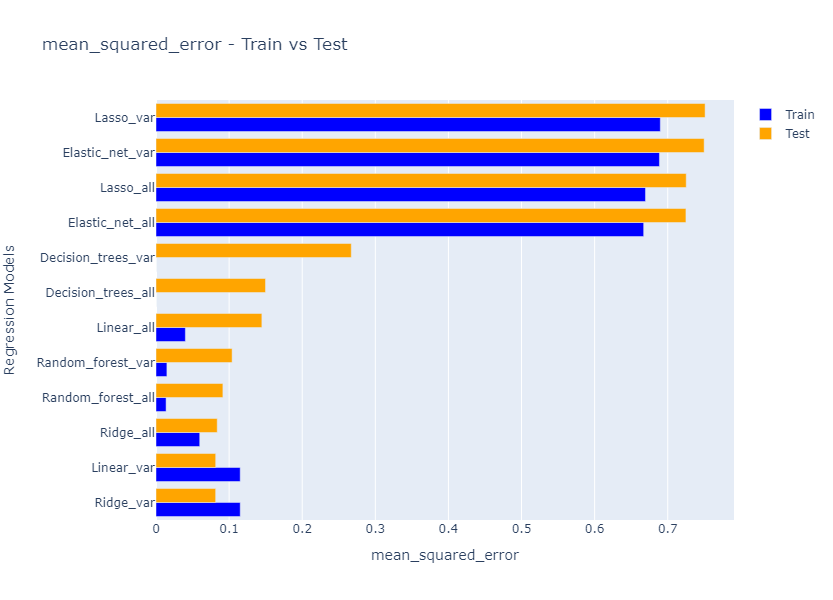

In [265]:
# Filtrer les résultats pour la métrique "mean_squared_error"
mse_results = all_results[all_results['metric'] == 'mean_squared_error'].sort_values(by='test')

# Créer un graphique avec Plotly Express
fig = go.Figure()

# Ajouter les barres pour le train
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['train'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Train',
    marker_color='blue',
    orientation='h'  # Utiliser une orientation horizontale
))

# Ajouter les barres pour le test
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['test'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Test',
    marker_color='orange',
    orientation='h'  # Utiliser une orientation horizontale
))

# Mise en forme du graphique
fig.update_layout(
    barmode='group',
    title='mean_squared_error - Train vs Test',
    xaxis_title='mean_squared_error',
    yaxis_title='Regression Models',
    height=600, 
    width=800
)

# Afficher le graphique
fig.show()


In [266]:
#Comparaison des modèles par rapport aux mean_squared_error
all_results[all_results['metric']=='max_error'].sort_values(by='test')

,,metric,train,test
Models,,,,
Linear_var,3,max_error,4.173180e+00,1.377726
Ridge_var,3,max_error,4.192323e+00,1.388094
Random_forest_all,3,max_error,8.656637e-01,1.420986
Random_forest_var,3,max_error,7.876827e-01,1.733356
Ridge_all,3,max_error,2.411140e+00,1.973088
Decision_trees_all,3,max_error,5.551115e-17,2.422360
Decision_trees_var,3,max_error,4.658385e-02,2.540373
Lasso_all,3,max_error,3.080025e+00,2.893082
Elastic_net_all,3,max_error,3.103572e+00,2.894483


In [267]:
all_results[all_results['metric']=='max_error'].sort_values(by='train')

,,metric,train,test
Models,,,,
Decision_trees_all,3,max_error,5.551115e-17,2.422360
Decision_trees_var,3,max_error,4.658385e-02,2.540373
Random_forest_var,3,max_error,7.876827e-01,1.733356
Random_forest_all,3,max_error,8.656637e-01,1.420986
Linear_all,3,max_error,1.460771e+00,4.657638
Ridge_all,3,max_error,2.411140e+00,1.973088
Elastic_net_var,3,max_error,2.972972e+00,2.907080
Lasso_var,3,max_error,2.974131e+00,2.908318
Lasso_all,3,max_error,3.080025e+00,2.893082


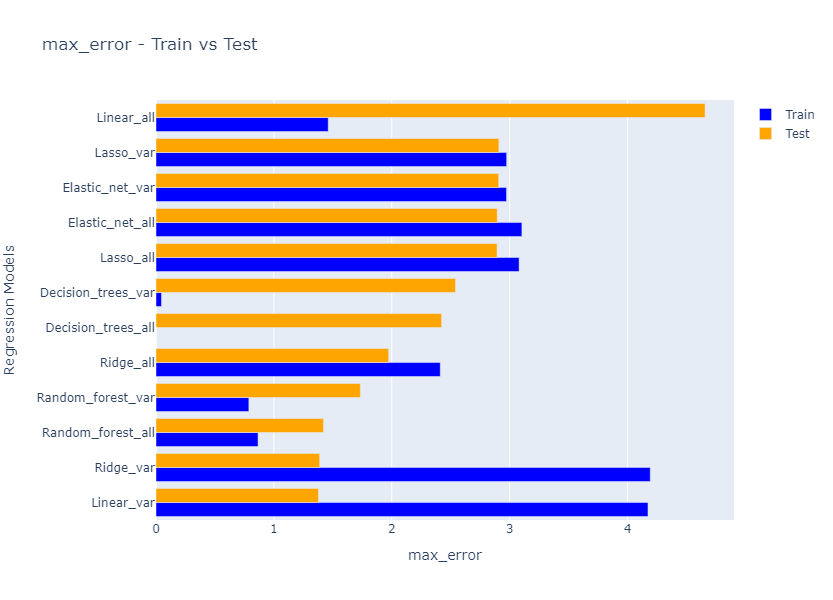

In [268]:
# Filtrer les résultats pour la métrique "mean_squared_error"
mse_results = all_results[all_results['metric'] == 'max_error'].sort_values(by='test')

# Créer un graphique avec Plotly Express
fig = go.Figure()

# Ajouter les barres pour le train
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['train'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Train',
    marker_color='blue',
    orientation='h'  # Utiliser une orientation horizontale
))

# Ajouter les barres pour le test
fig.add_trace(go.Bar(
    y=mse_results.index.get_level_values('Models'),
    x=mse_results['test'].values,  # Utiliser .values pour accéder aux valeurs du DataFrame
    name='Test',
    marker_color='orange',
    orientation='h'  # Utiliser une orientation horizontale
))

# Mise en forme du graphique
fig.update_layout(
    barmode='group',
    title='max_error - Train vs Test',
    xaxis_title='max_error',
    yaxis_title='Regression Models',
    height=600, 
    width=800
)

# Afficher le graphique
fig.show()


On remarque que les performances obtenues sur l'échantillon d'entrainement est presque égal aux performances de l'échantillon test. De même l’évaluation du modèle à l’aide des métriques tels que MAE, MSE, MAPA  nous donne des performances presque identique sur l’échantillon d’entrainement et l’échantillon test. Au bénéfice, de toutes ces preuves, on retient ce modèle acceptable. Pour savoir s’il est le meilleur ou pas, nous allons passer aux modèles de pénalisations en optimisant des hyperparamètres.

En considérant le R², le modèle Ridge performe plus que le modèle linéaire même si elle a une erreur MAE plus élevée. Aussi, au regard de la valeur du max_error, nous pouvons retenir aussi le modèle Ridge au détriment du modèle simple puisque l'erreur maximale que l'on puisse commettre en faisant la prédition avec Ridge est plus faible que celui du modèle simple.On retient alors que l'optimisation des hyperparamètres nous permet d'ameliorer la performance de notre modèle.

En se referant au critère du R², le modèle Ridge est préférable  au modèle Lasso car la part de variabilité des prix de maisons expliquée par les variables explicatives dans le modèle Ridge est superieur à celle expliqué dans le modèle Lasso.Comme vu, dans le cours cela n'est pas suffisant pour conclure de la performance des modèle, ce qui nous pousse à regarder les autres metriques d'evaluations des modèles.L'analyse des MAE montre que l'erreur maximal qu'on puisse commettre dans le modèle Ridge est inferieur à celle du modèle Lasso.On peut alors preferé le modèle Ridge au Lasso.


Tout comme dans les conclusions, le modèle Ridge presente un R² supérieur à celui du modèle avec Elastic net.L'analyse des autres metriques d'evaluations montre que le MSE du Ridge reste supereiur à celui de Elastic net.Cependant,le MAE,MASE de Elastic net sont infereiurs à celui du Ridge.Pour mieux detecter le meilleur modèle, nous nous dirigeons vers les modèles ensemblistes. 

On remarque que le modèle de Randomsforest obtient de très grande performance en train et en test mais avec un ecart de 0.11 points  On est tenté de dire que le modèle a fait du sur-apprentissage ce qui nécessite une simplification des variables utilisées malgré notre processing. 


On remarque que le modèle de decisions trees sur-apprend car il donne un R2 presque égale à 1 au test et donne un R2 egal à 0.62 au test soit un ecart de 0.37 points ce qui est énorme.Les memes remarques sont faites au niveau des metriques MSE et MAE avec de bonnes performances à l'entrainement mais des performances mauvaises au test.Tout ceci nous montre que malgré, la selection des variables jugées pertinentes, le modèle fait toujours du surapprentissage.A l'etat actuel on ne peut pas choisir ce modèle pour nos predictions.

Au regard de ces preuves empiriques et du laisser-paler des données, nous retenons  le modèle ridge comme meilleur modèle.

Les métriques du modèle Ridge sont donc meilleures que celles des autres modèles.
Nous allons donc utiliser ce dernier modèle pour notre prédiction

Text(0.5, 1.0, 'Normalitéé des résidus')

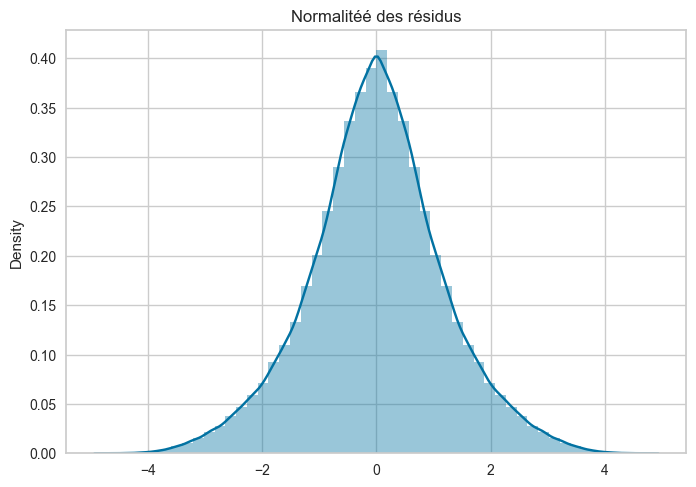

In [304]:
residus = Y_train- dt_estimator.predict(X_train)
sns.distplot(residus)
plt.title('Normalitéé des résidus')